In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Data loading and initial exploration 

In [2]:
titanic=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling null

In [6]:

print(titanic.isnull().sum())
titanic.drop_duplicates(inplace=True)

titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

titanic.drop('Cabin', axis=1, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Univariate Analysis 

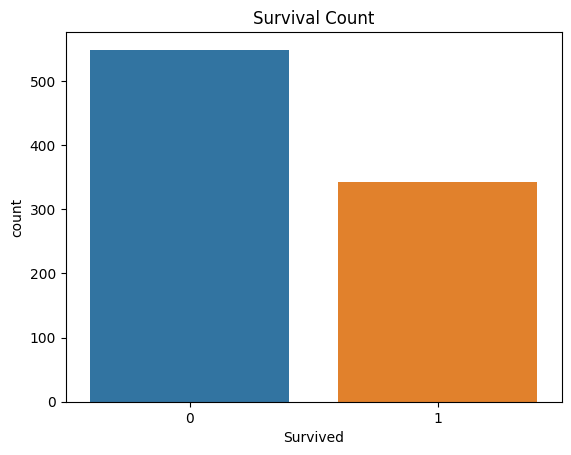

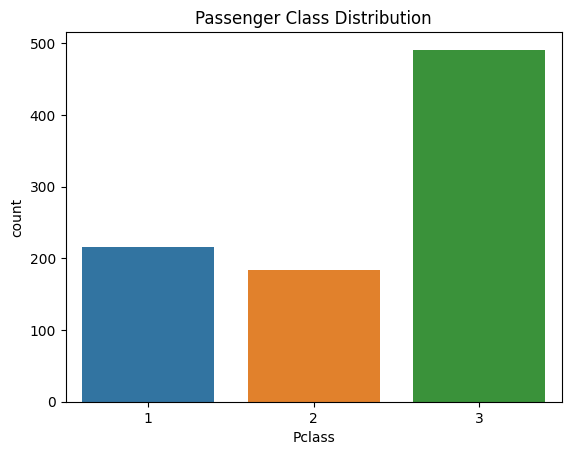

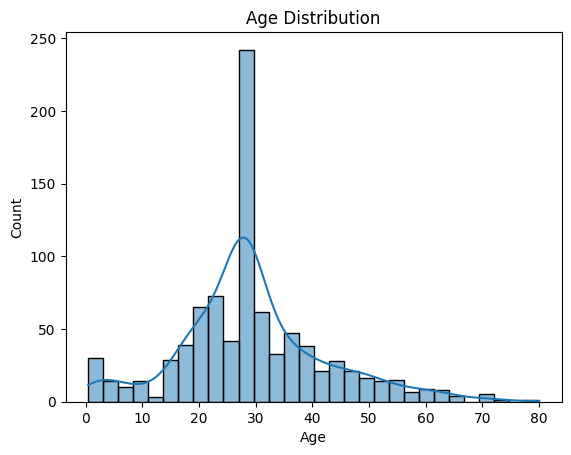

In [7]:
sns.countplot(x='Survived', data=titanic)#survival
plt.title('Survival Count')
plt.show()

# Passenger class distribution
sns.countplot(x='Pclass', data=titanic)
plt.title('Passenger Class Distribution')
plt.show()

# Age distribution
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


# Bivariate analysis 

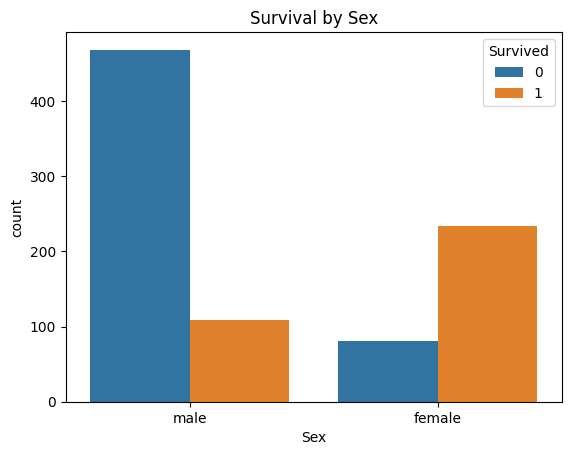

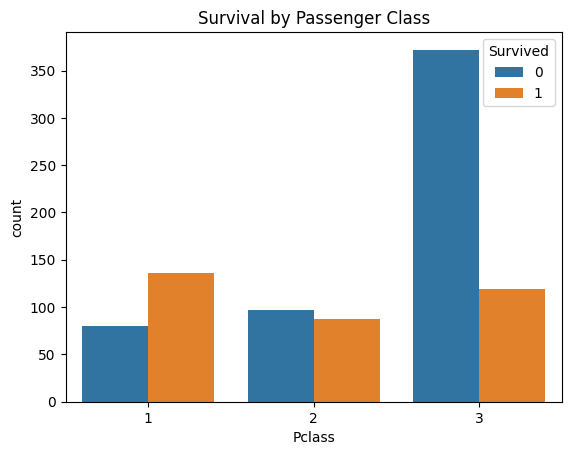

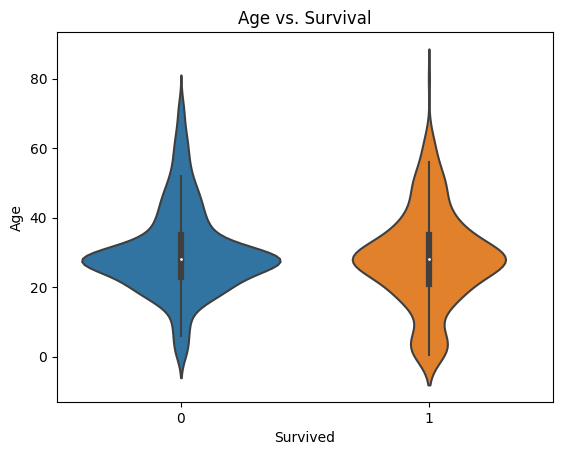

In [8]:
# Survival by sex
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival by Sex')
plt.show()

# Survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.show()

# Age vs. Survival
sns.violinplot(x='Survived', y='Age', data=titanic)
plt.title('Age vs. Survival')
plt.show()


# Multivariate analysis 

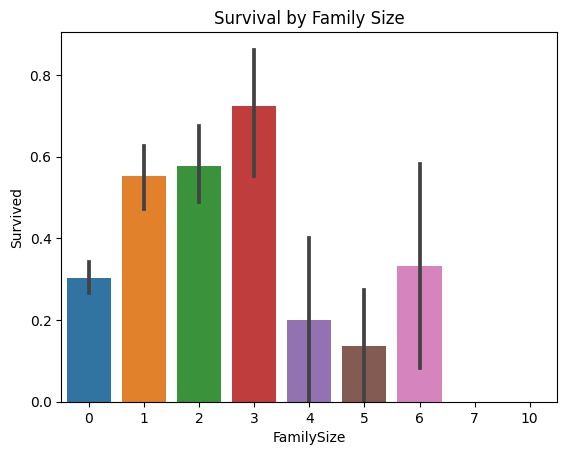

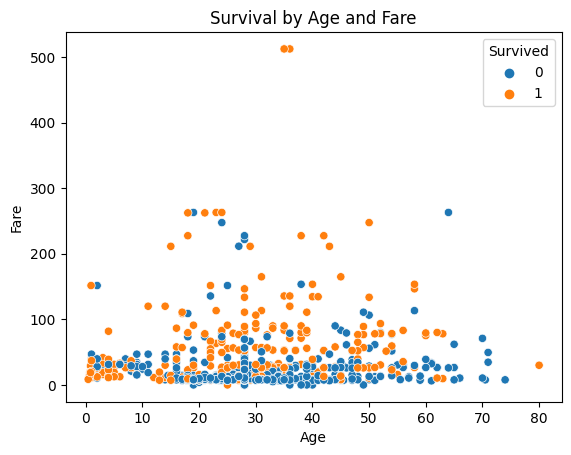

In [9]:
# Create a new feature for family size
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

# Survival by family size
sns.barplot(x='FamilySize', y='Survived', data=titanic)
plt.title('Survival by Family Size')
plt.show()

# Survival by age and fare
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Survival by Age and Fare')
plt.show()


# Visualization

In [10]:
# Interactive scatter plot of Age vs. Fare colored by Survival
fig = px.scatter(titanic, x='Age', y='Fare', color='Survived',
                 hover_data=['Sex', 'Pclass'], title='Age vs. Fare Colored by Survival')
fig.show()

# Interactive bar chart of Survival by Embarked
fig = px.bar(titanic, x='Embarked', color='Survived', barmode='group',
             title='Survival by Port of Embarkation')
fig.show()